# Norman preprocessing

The data already has been subject to rudimentary quality control.
However, we will add phase information and subset the data to highly variable genes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
import sys
sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_jupyter()

In [4]:
import pertpy as pt
import scanpy as sc

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [5]:
adata = pt.dt.norman_2019()

In [6]:
adata.obs

,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells,guide_AHR,guide_ARID1A,guide_ARRDC3,...,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,perturbation_name,perturbation_type,perturbation_value,perturbation_unit
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252,67,18.686567,1,True,2,0,0,0,...,4108,4108,19413.0,1327.0,6.835625,10,control,genetic,NaN,NaN
AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151,104,20.682692,1,True,1,0,0,0,...,3142,3142,13474.0,962.0,7.139676,3,TSC22D1,genetic,NaN,NaN
AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037,59,17.576271,1,True,1,0,0,0,...,4229,4229,23228.0,1548.0,6.664371,7,KLF1+MAP2K6,genetic,NaN,NaN
AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958,39,24.564103,1,True,1,0,0,0,...,2114,2114,6842.0,523.0,7.643963,2,control,genetic,NaN,NaN
AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244,14,17.428571,1,True,1,0,0,0,...,2753,2753,9130.0,893.0,9.780942,10,CEBPE+RUNX1T1,genetic,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGTACGT-8,FOXA3_NegCtrl0__FOXA3_NegCtrl0,2068,95,21.768421,8,True,1,0,0,0,...,3305,3305,14727.0,898.0,6.097644,3,FOXA3,genetic,NaN,NaN
TTTGTCATCCACTCCA-8,CELF2_NegCtrl0__CELF2_NegCtrl0,829,33,25.121212,8,True,1,0,0,0,...,2842,2842,9750.0,566.0,5.805128,10,CELF2,genetic,NaN,NaN
TTTGTCATCCCAACGG-8,BCORL1_NegCtrl0__BCORL1_NegCtrl0,136,9,15.111111,8,True,1,0,0,0,...,2824,2824,8670.0,490.0,5.651672,4,BCORL1,genetic,NaN,NaN


In [7]:
# Cell cycle genes identified by Tirosh et al., 2016
s_genes = ['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 
           'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 
           'HELLS', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 
           'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2', 
           'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1', 
           'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 
           'E2F8']

g2m_genes = ['HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 
             'TOP2A', 'NDC80', 'CKS2', 'NUF2', 'CKS1B', 'MKI67', 
             'TMPO', 'CENPF', 'TACC3', 'FAM64A', 'SMC4', 'CCNB2', 
             'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 
             'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'HN1', 
             'CDC20', 'TTK', 'CDC25C', 'KIF2C', 'RANGAP1', 'NCAPD2', 
             'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2', 'KIF23', 'HMMR', 
             'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE', 
             'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA']

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [8]:
sc.pp.normalize_total(adata)

In [9]:
sc.pp.log1p(adata)

In [10]:
sc.pp.highly_variable_genes(adata, subset=True, n_top_genes=4000)

In [11]:
sc.pp.neighbors(adata)

In [12]:
sc.pp.pca(adata)

In [13]:
sc.tl.umap(adata)

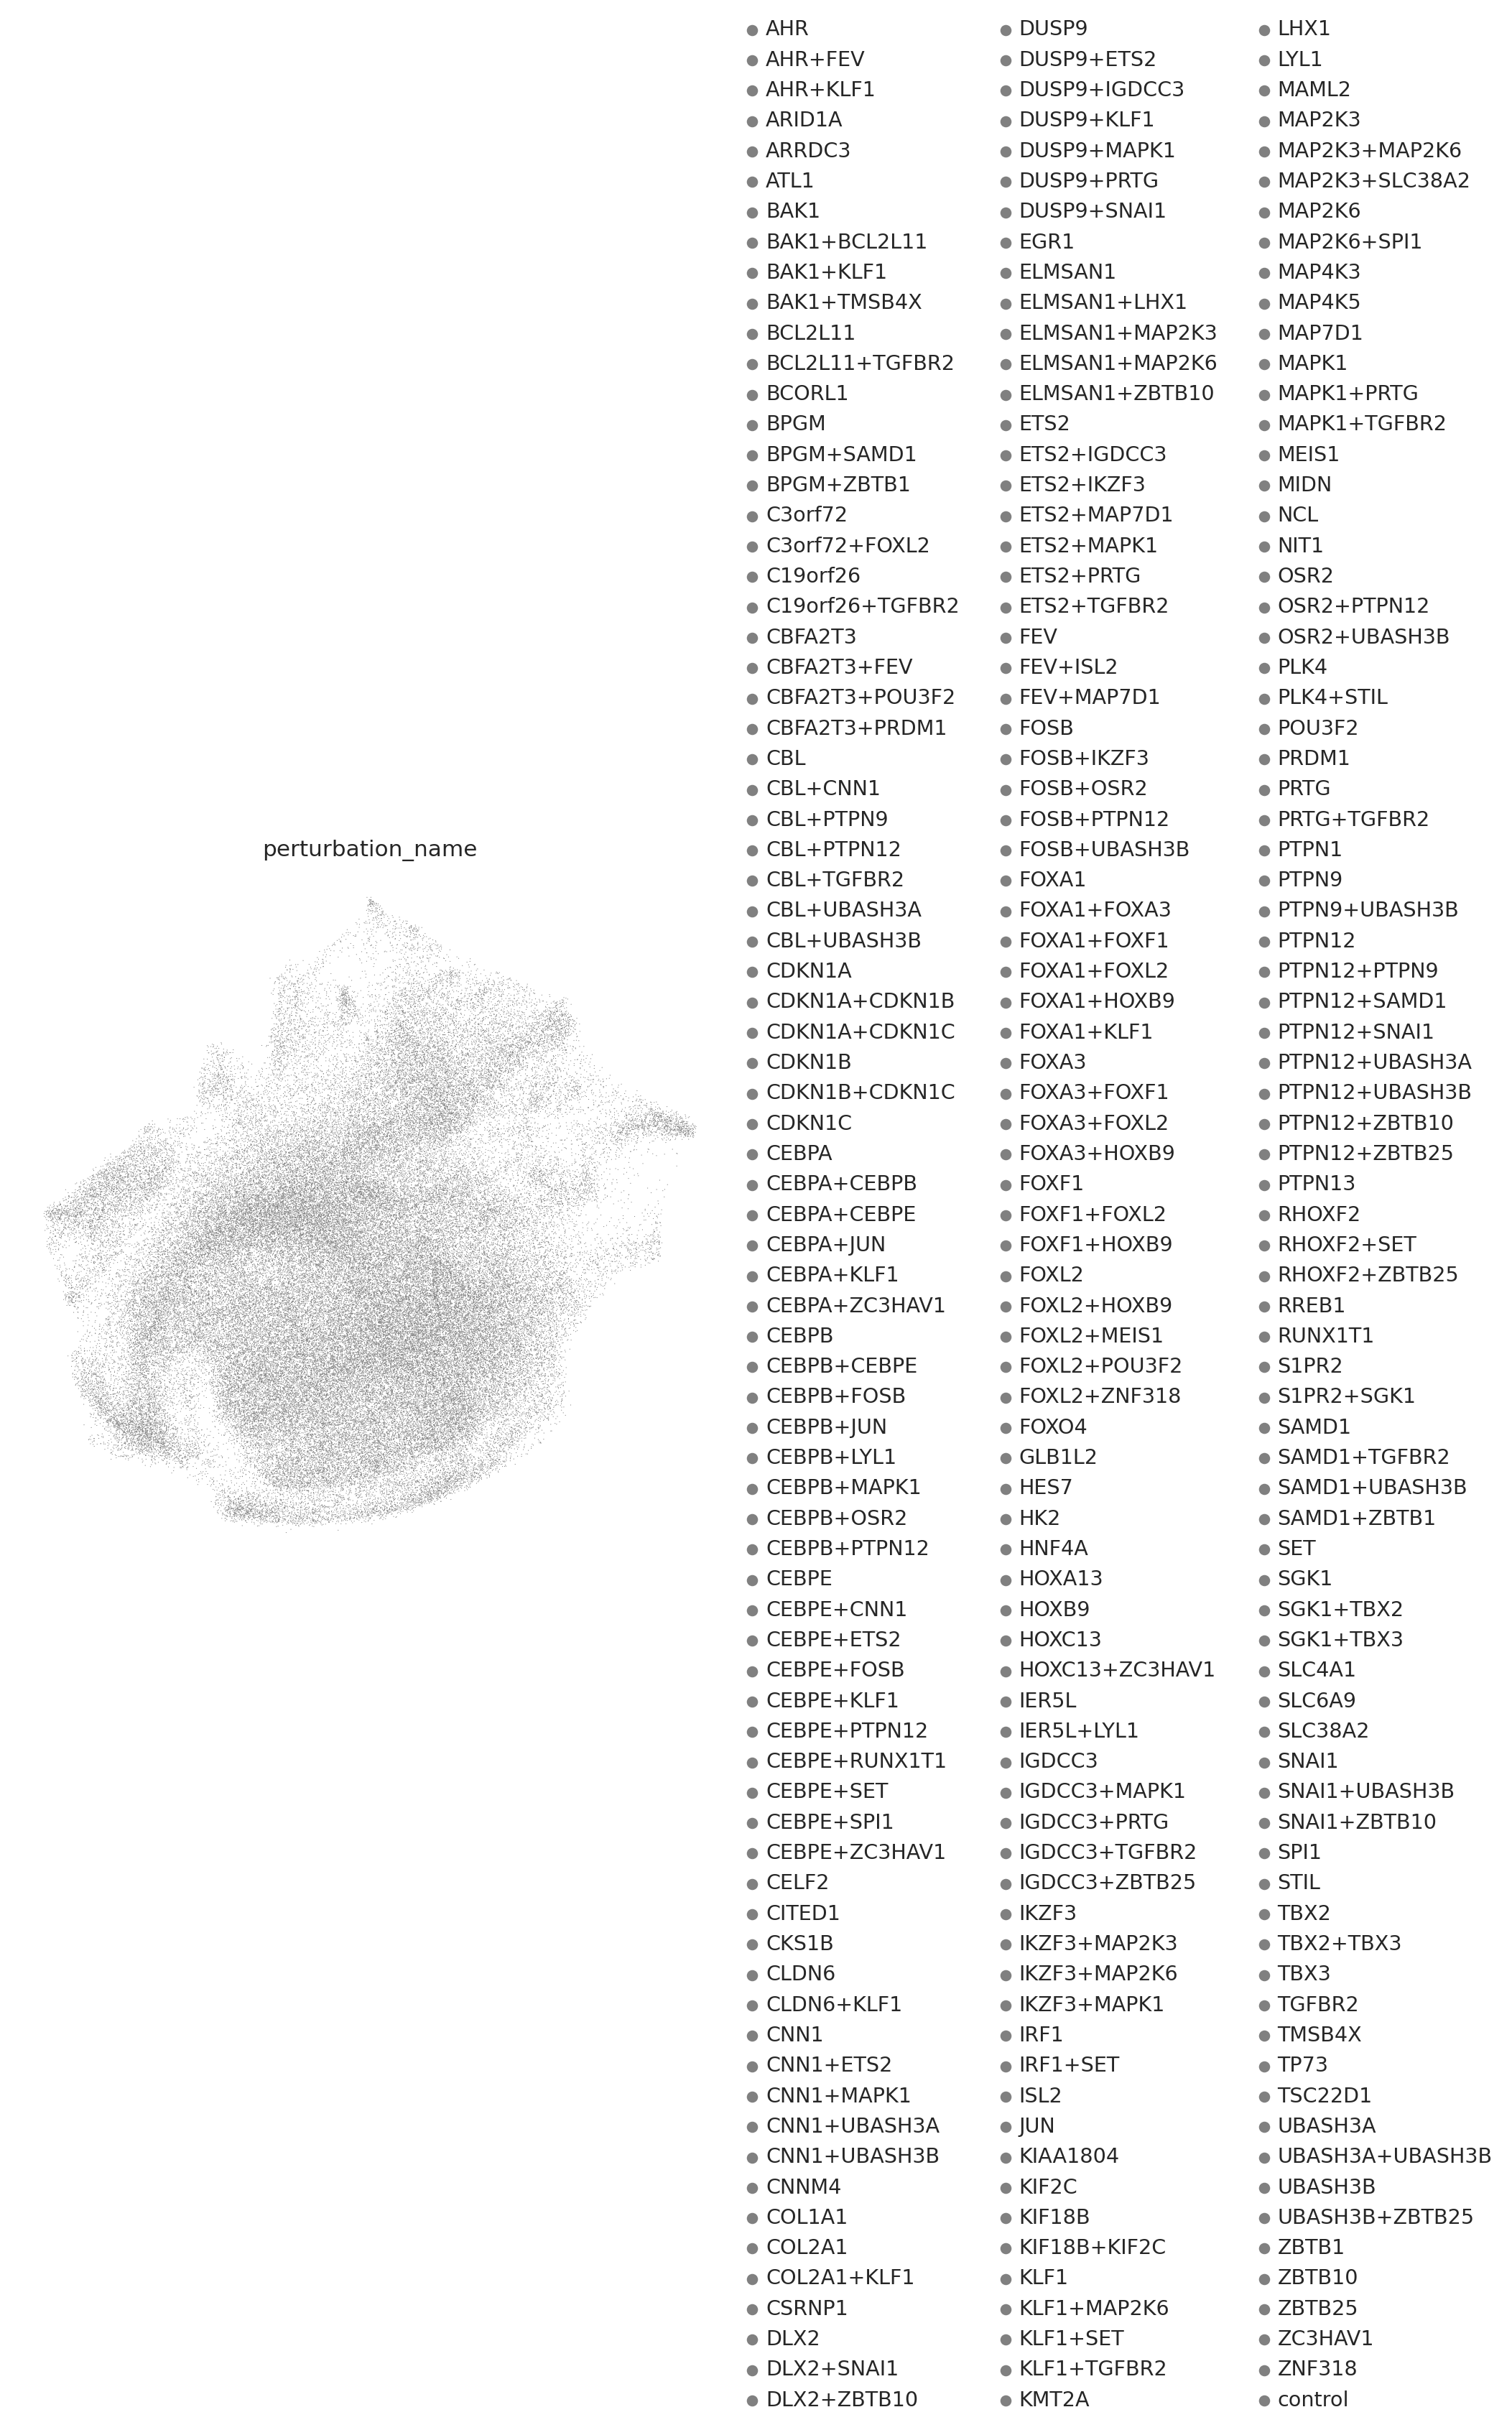

In [14]:
sc.pl.umap(adata, color="perturbation_name")

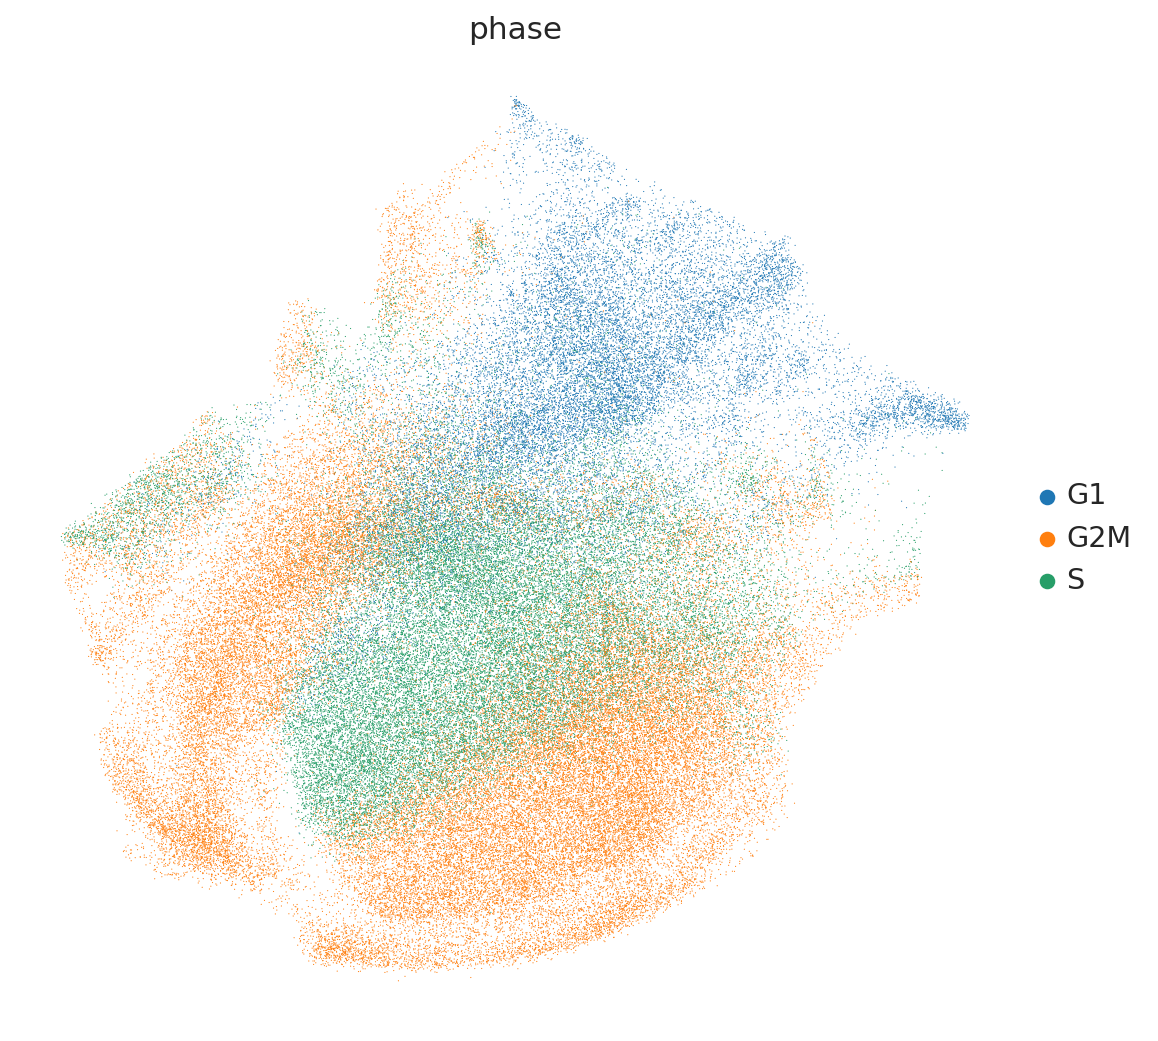

In [15]:
sc.pl.umap(adata, color="phase")

In [16]:
adata.write("data/norman_preprocessed.h5ad")